In [27]:
import jax.numpy as jnp
import numpy as np
import jax
import matplotlib.pyplot as plt
import tensorflow_probability.substrates.jax as tfp
tfd = tfp.distributions
%matplotlib inline

In [82]:
### True params
N_lin = 100
theta_true = jnp.array([4, 5])
x = jnp.linspace(-2, 2, N_lin)
f = theta_true[0] + theta_true[1]*x

# Or
x_dash = jnp.vstack([jnp.ones_like(x), x]).T
x_dash.shape
f1 = x_dash@theta_true
jnp.allclose(f, f1)

DeviceArray(True, dtype=bool)

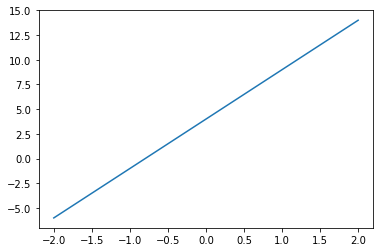

In [83]:
plt.plot(x, f1, label='f')

In [84]:
## Add some noise

eps = tfd.Normal(loc = 0.0, scale = 1.0).sample(seed = jax.random.PRNGKey(1), sample_shape=(100, ))
eps

DeviceArray([-1.8315924 , -0.1945556 , -1.689627  , -1.341975  ,
              0.7480396 ,  0.62496936, -0.8549421 ,  1.7891555 ,
             -0.25009313,  0.30042216, -0.5435825 ,  0.48230746,
             -1.0461814 , -0.45321622, -0.96305263,  0.70720404,
             -0.5832393 , -1.9153779 ,  0.86839205, -0.8620794 ,
              0.00356313, -0.9709372 ,  0.6864045 , -0.23982936,
             -0.5712965 ,  0.70485234,  1.681367  ,  1.0245626 ,
              0.44954523,  1.8193872 , -1.5887414 , -0.11622155,
             -0.47183546,  1.2526692 , -0.68714654,  1.50682   ,
             -1.1421199 ,  0.966971  , -0.6417875 , -0.32777554,
              0.07776388, -0.19298087,  0.6450959 ,  0.7954554 ,
              0.6728499 ,  0.1413189 , -0.1303851 , -1.362822  ,
              0.92622817, -0.36347324, -0.9384819 , -0.1389774 ,
             -0.36984143,  0.1220726 , -0.32229573, -2.5421538 ,
              2.890573  ,  0.3719327 ,  0.67268765, -0.5279769 ,
             -1.40523   ,

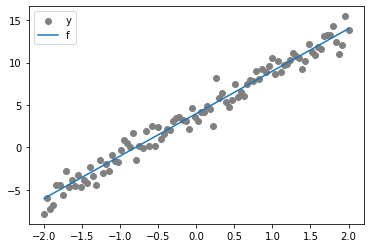

In [86]:
y = f1 + eps
plt.scatter(x, y, label='y', color='grey')
plt.plot(x, f, label='f')
plt.legend()

In [95]:
m0 = jnp.array([1.0, 2.0])
S0 = jnp.array([[1.0, 0.0], [0.0, 3.0]])

In [88]:
prior = tfd.MultivariateNormalFullCovariance(loc = m0, covariance_matrix=S0)

In [89]:
## Get a sample from the prior

In [90]:
prior.sample(seed = jax.random.PRNGKey(1))

DeviceArray([0.8838296, 5.8321733], dtype=float32)

In [91]:
N_samples = 500
prior_thetas = prior.sample(seed = jax.random.PRNGKey(1), sample_shape=(N_samples, ))
prior_thetas[:5]

DeviceArray([[-0.02569437,  2.575965  ],
             [ 1.4091281 ,  4.686681  ],
             [ 2.037253  ,  1.7397783 ],
             [ 1.8300356 ,  2.1965256 ],
             [-0.8372278 ,  5.4112654 ]], dtype=float32)

In [70]:
## Prior functions

In [92]:
f_fun = np.zeros((N_samples, N_lin))
for i in range(N_samples):
    theta_sample = prior_thetas[i]
    f_fun[i] = x_dash@theta_sample

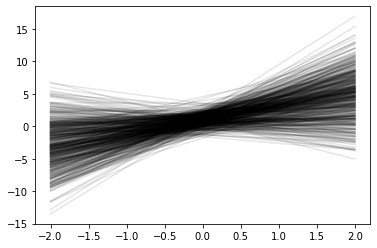

In [93]:
_ = plt.plot(x, f_fun.T, color='k', alpha=0.1)

In [108]:
## Prior predictive (noiseless case)

prior_predictive_mean = x_dash@m0
prior_predictive_cov = x_dash@S0@x_dash.T
prior_std = jnp.sqrt(prior_predictive_cov.diagonal())

In [109]:
prior_predictive_dist = tfd.MultivariateNormalFullCovariance(loc = prior_predictive_mean, covariance_matrix=prior_predictive_cov)

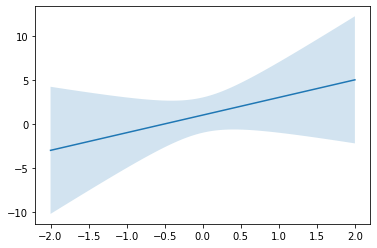

In [114]:
plt.plot(x, prior_predictive_mean)
plt.fill_between(x, prior_predictive_mean+2*prior_std,prior_predictive_mean-2*prior_std, alpha=0.2 )

# _ = plt.plot(x, f_fun.T, color='k', alpha=0.1)

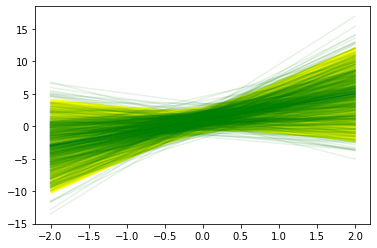

In [123]:
plt.plot(x, prior_predictive_mean)
plt.fill_between(x, prior_predictive_mean+2*prior_std,prior_predictive_mean-2*prior_std, alpha=1,color='yellow' )

_ = plt.plot(x, f_fun.T, color='green', alpha=0.1)